Initialize. Call the commandoes:

In [1]:
# Initialization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.integrate import odeint
import math
from math import exp, expm1
from dataclasses import dataclass

In [2]:
class BatchReactant:
    def __init__(self, Name, Coefficient, Concentration, Order, EndConcentration):
        self.Name = Name
        self.Coefficient = Coefficient
        self.Concentration = Concentration
        self.Order = Order
        self.EndConcentration = EndConcentration

reactant = [BatchReactant("Component A", 1, 0.80, 2, 'X'),
            BatchReactant("Component B", 2, 0.60, 1, 'X'),
            BatchReactant("Component C", 6, 0.88, 0, 'X')]

class BatchProduct:
    def __init__(self, Name, Coefficient, Concentration, EndConcentration):
        self.Name = Name
        self.Coefficient = Coefficient
        self.Concentration = Concentration
        self.EndConcentration = EndConcentration

product = [BatchProduct("Product D", 1, 0, 'X'),
           BatchProduct("Product E", 2, 0, 'X')]

class BatchReaction:
    def __init__(self, Reaction, Conversion, Rate, Volume):
        self.Reaction = Reaction
        self.Conversion = Conversion
        self.Rate = Rate
        self.Volume = Volume
        
reaction = BatchReaction("Reaction 1", 0.8, 1.2, 8)

In [3]:
# Finding the limiting reactant amount
Amount = [];
for r in reactant:
    amount = r.Concentration/r.Coefficient
    Amount.append(amount)
    Limit_amount = min(Amount)
    if Limit_amount == amount:
        limit_coef = r.Coefficient 
        limit_concentration = r.Concentration

In [4]:
# End concentration reactant
for r in reactant:
    r.EndConcentration = r.Concentration-r.Coefficient/limit_coef*limit_concentration*reaction.Conversion 

In [5]:
# End concentration products
for p in product:
    p.EndConcentration = p.Concentration+p.Coefficient/limit_coef*limit_concentration*reaction.Conversion

In [6]:
for r in reactant:
    print('The final concentration of ' + str(r.Name) + ', is ' + str(r.EndConcentration))
for p in product:
    print('The final concentration of ' + str(p.Name) + ', is ' + str(p.EndConcentration))

The final concentration of Component A, is 0.6826666666666668
The final concentration of Component B, is 0.3653333333333333
The final concentration of Component C, is 0.17599999999999993
The final concentration of Product D, is 0.11733333333333335
The final concentration of Product E, is 0.2346666666666667


In [7]:
#The mixing time for the reaction is now calculated  
def integrand(X):
    rate=1;
    for r in reactant:
        Q = (r.Concentration-r.Coefficient/limit_coef*limit_concentration*X)**(r.Order)
        rate = rate*Q
    return limit_concentration/(reaction.Rate*rate)
t_react, err = quad(integrand, 0, reaction.Conversion)

In [8]:
time = np.linspace(0,t_react,num=100)

In [9]:
# The reaction kinetics for the reactants 
Concentration_reactant_initial = [];
Order_reactant = [];
for r in reactant:
    Concentration_reactant_initial.append(r.Concentration)
    Order_reactant.append(r.Order)

In [10]:
# Model the system for the reactants
def model_reactant(Conc_r, time):
    rate_r = 1;
    for c in range(len(Concentration_reactant_initial)):
        each_r = Conc_r[c-1]**Order_reactant[c-1]
        rate_r = rate_r * each_r
    dCrdt = [];
    for r in reactant:
        dCrdt.append(-reaction.Rate * rate_r * r.Coefficient /limit_coef)
    return dCrdt

In [11]:
#Solve the reactant system
sol_r = odeint(model_reactant, Concentration_reactant_initial, time)

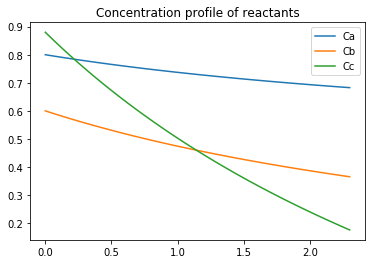

In [12]:
# Plot the reactants 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,sol_r[:,0], label = 'Ca')
ax.plot(time,sol_r[:,1], label = 'Cb')
ax.plot(time,sol_r[:,2], label = 'Cc')
plt.title('Concentration profile of reactants')
ax.legend()
plt.show()

In [13]:
# Finding the limiting reactant amount
Solution_limiting = [];
for r in reactant:
    amount = r.Concentration/r.Coefficient
    Amount.append(amount)
    Limit_amount = min(Amount)
    if Limit_amount == amount:
        limit_coef = r.Coefficient 
        limit_concentration = r.Concentration

In [19]:
print(sol_r[0])

[0.8  0.6  0.88]


In [15]:
# The reaction kinetics for the products 
Concentration_product_initial = [];
Coefficient_product = [];
for p in product:
    Concentration_product_initial.append(p.Concentration)
    Coefficient_product.append(p.Coefficient)

In [16]:
# Model the system for the products 
def model_product(Conc_p, time):
    dCpdt = [];
    for p in product:
        dCpdt.append(p.Concentration+p.Coefficient /limit_coef*limit_concentration*X)
    return dCpdt

In [17]:
#Solve the reactant system
sol_p = odeint(model_product, Concentration_product_initial, time)

NameError: name 'X' is not defined

In [ ]:
# Plot the reactants 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,sol_p[:,0], label = 'Cd')
ax.plot(time,sol_p[:,1], label = 'Ce')
plt.title('Concentration profile of products')
ax.legend()
plt.show()

In [ ]:
#The mixing time for the reaction is now calculated  
def integrand(X):
    rate=1;
    for r in reactant:
        Q = (r.Concentration-r.Coefficient/limit_coef*limit_concentration*X)**(r.Order)
        rate = rate*Q
    return limit_concentration/(reaction.Rate*rate)
t_react, err = quad(integrand, 0, reaction.Conversion)

In [ ]:
#The mixing time for the reaction is now calculated  
def integrand(X):
    for p in product:
        P = (p.Concentration-p.Coefficient/limit_coef*limit_concentration*X)
    return P
t_react, err = quad(integrand, 0, reaction.Conversion)

In [ ]:
len(Concentration_product_initial)